# <b>Availability</b>

<b>May 21, 2025</b>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# show all columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## <b>Import Datasets & EDA</b>

In [28]:
df = pd.read_csv("active_professional_raw.csv")
data = pd.read_csv("professional_calendar_raw.csv")

<div class="alert alert-block alert-success">
<b>active_professional_raw.csv</b> as <b>df</b> shows each individual service provider's start date and layoff date
</div>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   professional_id       4357 non-null   int64 
 1   first_partition_date  4357 non-null   object
 2   layoff_date           1348 non-null   object
 3   last_booking_date     3502 non-null   object
dtypes: int64(1), object(3)
memory usage: 136.3+ KB


In [4]:
df

,professional_id,first_partition_date,layoff_date,last_booking_date
0,1,2016-01-13 12:00:00,2020-12-08 14:00:02,2020-10-31 07:00:00
1,3,2021-05-05 17:00:00,2021-05-06 14:00:03,NaN
2,4,2016-02-04 18:00:30,NaN,2022-09-16 15:00:00
3,5,2016-03-28 13:00:00,NaN,2030-01-31 00:00:00
4,6,2016-03-20 14:00:00,NaN,2023-06-26 16:00:00
...,...,...,...,...
4352,10991,2024-07-08 08:00:18,NaN,2024-07-08 08:00:18
4353,11007,2024-07-11 17:19:00,NaN,NaN
4354,11025,2024-07-23 10:00:12,2025-04-18 16:08:47,2025-02-03 09:00:00
4355,11068,2024-09-12 08:30:25,NaN,2025-12-21 09:00:42


### <b>1. Start, Layoff, End Date</b>

I'll use df1 to find each service provider start date and last date

<div class="alert alert-block alert-info">
<b>Note:</b> if last date is in the year 2025 or more, I should set it to be 2024-12-31</div>

In [36]:
df["last_booking_date"] = pd.to_datetime(df["last_booking_date"])
cutoff = pd.Timestamp("2024-12-31")

df["last_booking_date"] = df["last_booking_date"].apply(lambda x: min(x, cutoff))
df

,professional_id,first_partition_date,layoff_date,last_booking_date
0,1,2016-01-13 12:00:00,2020-12-08 14:00:02,2020-10-31 07:00:00
1,3,2021-05-05 17:00:00,2021-05-06 14:00:03,NaT
2,4,2016-02-04 18:00:30,NaN,2022-09-16 15:00:00
3,5,2016-03-28 13:00:00,NaN,2024-12-31 00:00:00
4,6,2016-03-20 14:00:00,NaN,2023-06-26 16:00:00
...,...,...,...,...
4352,10991,2024-07-08 08:00:18,NaN,2024-07-08 08:00:18
4353,11007,2024-07-11 17:19:00,NaN,NaT
4354,11025,2024-07-23 10:00:12,2025-04-18 16:08:47,2024-12-31 00:00:00
4355,11068,2024-09-12 08:30:25,NaN,2024-12-31 00:00:00


Which shows each individual service provider's start working date, layoff date, and their last working date

### <b>2. Unavailable Hour</b>

Now we'll leave this aside for now, we will focus another dataset about service provider's unavailable hour which the dataset collects when each service provider turns off their working day.

Each row in this dataset means service provider has turn off service on that day for X hour (blocked_time) — for maximum blocked_time and availability_hour is 12 hour, if the provider entered blocked_time for a few hours then the availability_hour = (12 - blocked_time)

In [6]:
data

,partition_date,partition_month,professional_id,start_time,end_time,blocked_time,availability_hour
0,2024-01-01,2024-01,1257,NaN,NaN,12.0,0.0
1,2024-01-02,2024-01,1257,NaN,NaN,12.0,0.0
2,2024-01-03,2024-01,1257,NaN,NaN,12.0,0.0
3,2024-01-04,2024-01,1257,NaN,NaN,12.0,0.0
4,2024-01-05,2024-01,1257,NaN,NaN,12.0,0.0
...,...,...,...,...,...,...,...
722402,2024-12-31,2024-12,11210,NaN,NaN,12.0,0.0
722403,2024-12-30,2024-12,6907,NaN,NaN,12.0,0.0
722404,2024-12-31,2024-12,6907,NaN,NaN,12.0,0.0
722405,2024-12-31,2024-12,1727,NaN,NaN,12.0,0.0


In [7]:
data.blocked_time.value_counts()

blocked_time
12.0    489727
9.0      32653
10.0     25593
8.0      25322
7.0      19346
11.0     18888
6.0      15558
5.0      14311
4.0      12771
3.0      10031
8.5       7681
9.5       7295
7.5       6298
4.5       5725
6.5       5297
10.5      5259
5.5       4493
11.5      4214
3.5       4123
2.0       3575
2.5       2099
1.0        776
0.0        723
0.5        421
1.5        228
Name: count, dtype: int64

In [8]:
data.availability_hour.value_counts()

availability_hour
0.0     489727
3.0      32653
2.0      25593
4.0      25322
5.0      19346
1.0      18888
6.0      15558
7.0      14311
8.0      12771
9.0      10031
3.5       7681
2.5       7295
4.5       6298
7.5       5725
5.5       5297
1.5       5259
6.5       4493
0.5       4214
8.5       4123
10.0      3575
9.5       2099
11.0       776
12.0       723
11.5       421
10.5       228
Name: count, dtype: int64

In [9]:
data.partition_date.min()

'2024-01-01'

In [10]:
data.partition_date.max()

'2024-12-31'

#### <b>2.1 Generate a Date Dataset</b>
From 2024-01-01 to 2024-12-31 generate a new dataset that contain only the date from 2024-01-01 to 2024-12-31 in rows similar to partition_date in "data", so that we can join with the "data" to show the whole calendar of availability of each individual service provider.

In [11]:
# Generate a daily date range for the year 2024
calendar = pd.DataFrame({"partition_date": pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")})
calendar

,partition_date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
361,2024-12-27
362,2024-12-28
363,2024-12-29
364,2024-12-30


In [12]:
# Extract partition_month in the same format as in your "data"
#calendar["partition_month"] = calendar["partition_date"].dt.to_period("M").astype(str)
#calendar

#### <b>2.2 Join partition_date on data</b>

In [13]:
# Get unique provider IDs from data
provider_ids = data["professional_id"].unique()

# Create a full 2024 calendar
calendar = pd.DataFrame({"partition_date": pd.date_range("2024-01-01", "2024-12-31")})

# Create full cross join of provider IDs with all dates
full_calendar = pd.merge(
    pd.DataFrame({"professional_id": provider_ids}),
    calendar,
    how="cross" # requires pandas >= 1.2.0
)

full_calendar

,professional_id,partition_date
0,1257,2024-01-01
1,1257,2024-01-02
2,1257,2024-01-03
3,1257,2024-01-04
4,1257,2024-01-05
...,...,...
1578187,12049,2024-12-27
1578188,12049,2024-12-28
1578189,12049,2024-12-29
1578190,12049,2024-12-30


In [14]:
# Change partiton_date's data type to datetime
data["partition_date"] = pd.to_datetime(data["partition_date"])

# Finally, merge with the original data to attach availability info
full_availability = pd.merge(
    full_calendar,
    data,
    on=["professional_id", "partition_date"],
    how="left" # ensures all provider-date pairs are kept
)

full_availability

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
0,1257,2024-01-01,2024-01,NaN,NaN,12.0,0.0
1,1257,2024-01-02,2024-01,NaN,NaN,12.0,0.0
2,1257,2024-01-03,2024-01,NaN,NaN,12.0,0.0
3,1257,2024-01-04,2024-01,NaN,NaN,12.0,0.0
4,1257,2024-01-05,2024-01,NaN,NaN,12.0,0.0
...,...,...,...,...,...,...,...
1580273,12049,2024-12-27,2024-12,NaN,NaN,12.0,0.0
1580274,12049,2024-12-28,2024-12,NaN,NaN,12.0,0.0
1580275,12049,2024-12-29,2024-12,NaN,NaN,12.0,0.0
1580276,12049,2024-12-30,2024-12,NaN,NaN,12.0,0.0


##### <b>Data Auditing (After Joining)</b>

<b>start_time</b> and <b>end_time</b> will have their value when blocked_time is not 12.0

In [ ]:
full_availability[full_availability["professional_id"] == 1257].blocked_time.value_counts()

blocked_time
12.0    352
9.0      14
Name: count, dtype: int64

In [18]:
full_availability[(full_availability["professional_id"] == 1257) & (full_availability["blocked_time"] == 9.0)]

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
160,1257,2024-06-09,2024-06,10:00,19:00,9.0,3.0
166,1257,2024-06-15,2024-06,10:00,19:00,9.0,3.0
167,1257,2024-06-16,2024-06,10:00,19:00,9.0,3.0
173,1257,2024-06-22,2024-06,10:00,19:00,9.0,3.0
174,1257,2024-06-23,2024-06,10:00,19:00,9.0,3.0
181,1257,2024-06-30,2024-06,10:00,19:00,9.0,3.0
187,1257,2024-07-06,2024-07,10:00,19:00,9.0,3.0
188,1257,2024-07-07,2024-07,10:00,19:00,9.0,3.0
194,1257,2024-07-13,2024-07,10:00,19:00,9.0,3.0
195,1257,2024-07-14,2024-07,10:00,19:00,9.0,3.0


This service provider has a lot of Available days — NaN value in <b>blocked_time</b> and <b>availibility_hour</b>

In [33]:
full_availability[full_availability["professional_id"] == 11210].blocked_time.value_counts()

blocked_time
6.5     69
12.0    51
Name: count, dtype: int64

In [34]:
full_availability[full_availability["professional_id"] == 11210]

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
1255556,11210,2024-01-01,NaN,NaN,NaN,NaN,NaN
1255557,11210,2024-01-02,NaN,NaN,NaN,NaN,NaN
1255558,11210,2024-01-03,NaN,NaN,NaN,NaN,NaN
1255559,11210,2024-01-04,NaN,NaN,NaN,NaN,NaN
1255560,11210,2024-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1255917,11210,2024-12-27,NaN,NaN,NaN,NaN,NaN
1255918,11210,2024-12-28,NaN,NaN,NaN,NaN,NaN
1255919,11210,2024-12-29,NaN,NaN,NaN,NaN,NaN
1255920,11210,2024-12-30,NaN,NaN,NaN,NaN,NaN


#### <b>2.3 Available Days</b>

Those NaNs found in the <b>blocked_time</b> and <b>availability_hour</b> meaning they are available on that day — replace all NaN in <b>blocked_time</b> with 0.0 and <b>availability_hour</b> with 12.0

In [ ]:
# Check if blocked_time and availability_hour contain any missing value
full_availability[full_availability["blocked_time"].isnull() == True]

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
487,1365,2024-05-01,NaN,NaN,NaN,NaN,NaN
488,1365,2024-05-02,NaN,NaN,NaN,NaN,NaN
489,1365,2024-05-03,NaN,NaN,NaN,NaN,NaN
490,1365,2024-05-04,NaN,NaN,NaN,NaN,NaN
491,1365,2024-05-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1580268,12049,2024-12-22,NaN,NaN,NaN,NaN,NaN
1580269,12049,2024-12-23,NaN,NaN,NaN,NaN,NaN
1580270,12049,2024-12-24,NaN,NaN,NaN,NaN,NaN
1580271,12049,2024-12-25,NaN,NaN,NaN,NaN,NaN


In [35]:
full_availability['blocked_time'] = full_availability['blocked_time'].fillna(0.0)
full_availability['availability_hour'] = full_availability['availability_hour'].fillna(12.0)

# Take a look at missing value again...
full_availability[full_availability["blocked_time"].isnull() == True]

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour


### <b>3. Filter by Start, Layoff, and End Date</b>

Next, we need to filter the rows in <b>full_availability.partition_date</b> by remove all the rows that exist in the table before <b>df.first_partition_date</b> and after the <b>df.layoff_date</b> or <b>df.last_booking_date</b>

In [37]:
df.head()

,professional_id,first_partition_date,layoff_date,last_booking_date
0,1,2016-01-13 12:00:00,2020-12-08 14:00:02,2020-10-31 07:00:00
1,3,2021-05-05 17:00:00,2021-05-06 14:00:03,NaT
2,4,2016-02-04 18:00:30,NaN,2022-09-16 15:00:00
3,5,2016-03-28 13:00:00,NaN,2024-12-31 00:00:00
4,6,2016-03-20 14:00:00,NaN,2023-06-26 16:00:00


In [40]:
full_availability[full_availability["professional_id"] == 1].head()

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
1560148,1,2024-01-01,NaN,NaN,NaN,0.0,12.0
1560149,1,2024-01-02,NaN,NaN,NaN,0.0,12.0
1560150,1,2024-01-03,NaN,NaN,NaN,0.0,12.0
1560151,1,2024-01-04,NaN,NaN,NaN,0.0,12.0
1560152,1,2024-01-05,NaN,NaN,NaN,0.0,12.0


In [41]:
# Ensure datetime format
df["first_partition_date"] = pd.to_datetime(df["first_partition_date"])
df["layoff_date"] = pd.to_datetime(df["layoff_date"])
df["last_booking_date"] = pd.to_datetime(df["last_booking_date"])
full_availability["partition_date"] = pd.to_datetime(full_availability["partition_date"])

# Create a new column for end_date: min(layoff_date, last_booking_date) while ignoring NaT
df["end_date"] = df[["layoff_date", "last_booking_date"]].min(axis=1)
df.head()

,professional_id,first_partition_date,layoff_date,last_booking_date,end_date
0,1,2016-01-13 12:00:00,2020-12-08 14:00:02,2020-10-31 07:00:00,2020-10-31 07:00:00
1,3,2021-05-05 17:00:00,2021-05-06 14:00:03,NaT,2021-05-06 14:00:03
2,4,2016-02-04 18:00:30,NaT,2022-09-16 15:00:00,2022-09-16 15:00:00
3,5,2016-03-28 13:00:00,NaT,2024-12-31 00:00:00,2024-12-31 00:00:00
4,6,2016-03-20 14:00:00,NaT,2023-06-26 16:00:00,2023-06-26 16:00:00


In [44]:
# Left join to align availability with provider timelines
temp = full_availability.merge(
       df[["professional_id", "first_partition_date", "end_date"]],
       on="professional_id",
       how="left"
)
temp.head()

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour,first_partition_date,end_date
0,1257,2024-01-01,2024-01,NaN,NaN,12.0,0.0,2019-05-04 09:17:28,2020-08-29 11:42:53
1,1257,2024-01-02,2024-01,NaN,NaN,12.0,0.0,2019-05-04 09:17:28,2020-08-29 11:42:53
2,1257,2024-01-03,2024-01,NaN,NaN,12.0,0.0,2019-05-04 09:17:28,2020-08-29 11:42:53
3,1257,2024-01-04,2024-01,NaN,NaN,12.0,0.0,2019-05-04 09:17:28,2020-08-29 11:42:53
4,1257,2024-01-05,2024-01,NaN,NaN,12.0,0.0,2019-05-04 09:17:28,2020-08-29 11:42:53


In [45]:
# Filter based on working period
filtered_availability = temp[
    (temp["partition_date"] >= temp["first_partition_date"]) &
    (temp["partition_date"] <= temp["end_date"])
].drop(columns=["first_partition_date", "end_date"]) # drop helper columns too
filtered_availability

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
366,1365,2024-01-01,2024-01,NaN,NaN,12.0,0.0
367,1365,2024-01-02,2024-01,10:00,16:00,6.0,6.0
368,1365,2024-01-03,2024-01,10:00,16:00,6.0,6.0
369,1365,2024-01-04,2024-01,10:00,16:00,6.0,6.0
370,1365,2024-01-05,2024-01,NaN,NaN,12.0,0.0
...,...,...,...,...,...,...,...
1575515,11998,2024-12-27,2024-12,09:30,18:00,8.5,3.5
1575516,11998,2024-12-28,2024-12,09:30,18:00,8.5,3.5
1575517,11998,2024-12-29,2024-12,09:30,18:00,8.5,3.5
1575518,11998,2024-12-30,2024-12,NaN,NaN,12.0,0.0


### <b>4. Availability Rate</b>

🧮 Logic:
<ul>
    <li>A day is considered available if availability_hour > 0.</li>
    <li>Group by professional_id and partition_month to:
    <ul>
        <li>Count total days in the month (day_count)</li>
        <li>Count how many of those days were available (available_day_count)</li>
        <li>Compute availability_rate = available_day_count / day_count</li>
    </ul>
    <li>Compute availability_rate = available_day_count / day_count</li>
</ul>

#### <b>4.1 Monthly Availability Rate</b>

In [46]:
filtered_availability.head()

,professional_id,partition_date,partition_month,start_time,end_time,blocked_time,availability_hour
366,1365,2024-01-01,2024-01,NaN,NaN,12.0,0.0
367,1365,2024-01-02,2024-01,10:00,16:00,6.0,6.0
368,1365,2024-01-03,2024-01,10:00,16:00,6.0,6.0
369,1365,2024-01-04,2024-01,10:00,16:00,6.0,6.0
370,1365,2024-01-05,2024-01,NaN,NaN,12.0,0.0


In [48]:
# Ensure partition_month exists and is datetime type
filtered_availability["partition_month"] = filtered_availability["partition_date"].dt.to_period("M").astype(str)

# Calculate availability rate
monthly_availability = (
    filtered_availability
    .assign(is_available = filtered_availability["availability_hour"] > 0)
    .groupby(["professional_id", "partition_month"])
    .agg(
        day_count=("partition_date", "count"),
        available_day_count=("is_available", "sum")
    )
    .assign(availability_rate = lambda x: x["available_day_count"] / x["day_count"])
    .reset_index()
)
monthly_availability

,professional_id,partition_month,day_count,available_day_count,availability_rate
0,5,2024-01,31,31,1.000000
1,5,2024-02,29,29,1.000000
2,5,2024-03,31,24,0.774194
3,5,2024-04,30,30,1.000000
4,5,2024-05,31,31,1.000000
...,...,...,...,...,...
24202,12027,2024-12,4,4,1.000000
24203,12028,2024-12,5,0,0.000000
24204,12029,2024-12,3,3,1.000000
24205,12032,2024-12,1,0,0.000000


#### <b>4.2 Individual Availability Rate</b>

It seems like I did it wrong (I don’t need to group by month anymore). Actually, I want the overall availability rate per service provider (from their start to end date)

🧩 Updated Logic:
<ul>
    <li>For each professional_id, count:</li>
    <ul>
        <li>Total days (day_count)</li>
        <li>Available days where availability_hour > 0 (available_day_count)</li>
    </ul>
    <li>Compute availability_rate = available_day_count / day_count</li>
</ul>

In [51]:
# Mark available days
filtered_availability["is_available"] = filtered_availability["availability_hour"] > 0

# Calculate overall availability rate per provider
overall_availability = (
    filtered_availability
    .groupby("professional_id")
    .agg(
        day_count=("partition_date", "count"),
        available_day_count=("is_available", "sum")
    )
    .assign(availability_rate = lambda x: x["available_day_count"] / x["day_count"])
    .reset_index()
)
overall_availability

,professional_id,day_count,available_day_count,availability_rate
0,5,366,359,0.980874
1,19,366,14,0.038251
2,21,366,188,0.513661
3,24,366,29,0.079235
4,28,366,1,0.002732
...,...,...,...,...
3319,12027,4,4,1.000000
3320,12028,5,0,0.000000
3321,12029,3,3,1.000000
3322,12032,1,0,0.000000


### <b>5. Distribution of Service Provider by Availability Rate in 2024</b>

#### <b>5.1 Seaborn</b>

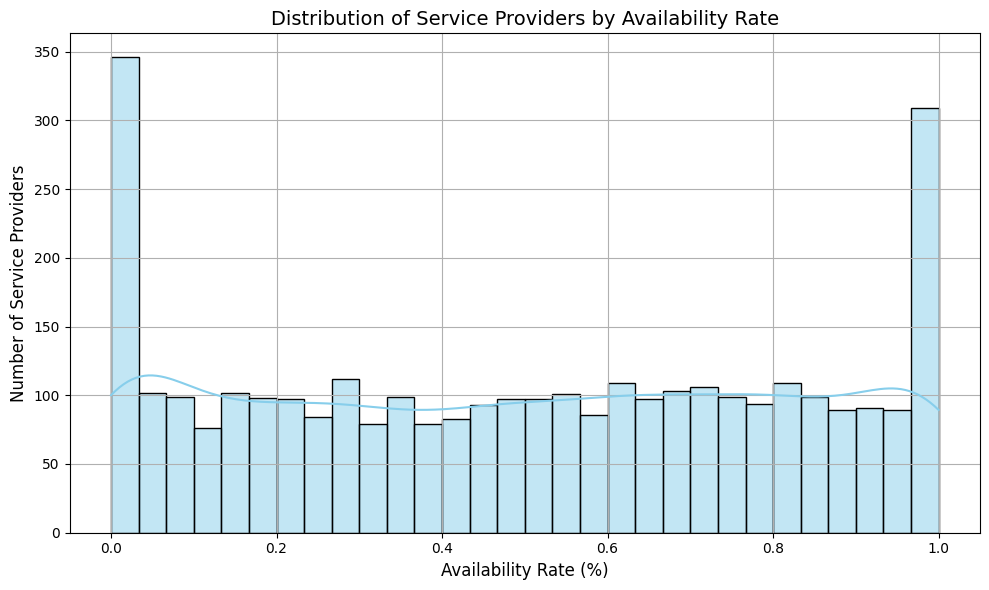

In [55]:
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(overall_availability['availability_rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Service Providers by Availability Rate', fontsize=14)
plt.xlabel('Availability Rate (%)', fontsize=12)
plt.ylabel('Number of Service Providers', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### <b>5.2 Plotly</b>
Use Plotly for more interactivity

In [56]:
#import plotly.express as px

fig = px.histogram(overall_availability, x='availability_rate',
                   nbins=30, title='Distribution of Service Providers by Availability Rate')
fig.update_layout(xaxis_title='Availability Rate (%)',
                  yaxis_title='Number of Service Providers',
                  bargap=0.05)
fig.show()

#### <b>5.3 Matplotlib</b>

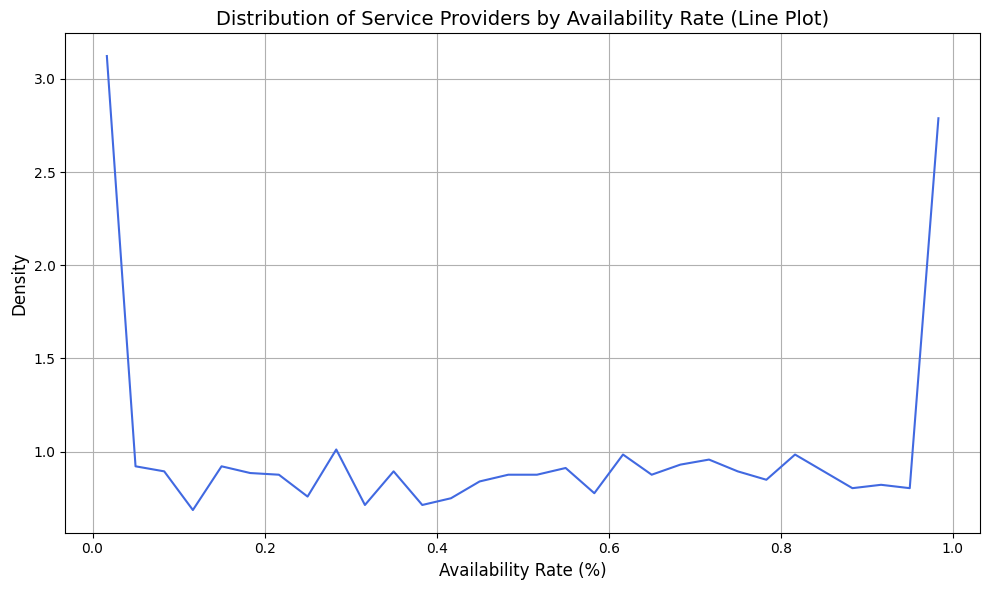

In [57]:
#import matplotlib.pyplot as plt
#import numpy as np

# Calculate histogram
counts, bin_edges = np.histogram(overall_availability['availability_rate'], bins=30, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot as line
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts, linestyle='-', marker='', color='royalblue')
plt.title('Distribution of Service Providers by Availability Rate (Line Plot)', fontsize=14)
plt.xlabel('Availability Rate (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### <b><u>Executive Summary</u></b>

From this distribution we observe:
<ul>
    <li>A considerable number of service providers has little-to-no availability (~0% availability rate).</li>
    <li>Conversely, a significant number of service providers has near full availability (~100% availability rate).</li>
    <li>Between these extremes, a significant number of service providers emerges without strong breakpoints.</li>
</ul>